# LetsGrowMoreVIP-Data Science Intern
# Author-Ritesh Meshram
# Stock Market Prediction And Forecasting Using Stacked LSTM(BEGINNER LEVEL TASK)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### loading the data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
data.isnull().sum() # finding null value

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
data.describe() #looking into statistical values

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
data.reset_index(inplace=True) # to make index in proper order
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:
df1=data.reset_index()['Close']
df1.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

### Plot the graph of stocks at Close

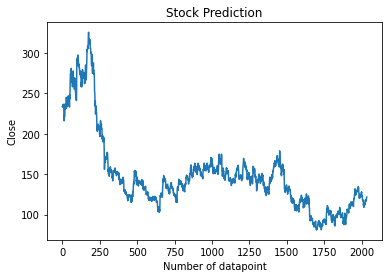

In [9]:
plt.plot(data["Close"])
plt.xlabel('Number of datapoint')
plt.ylabel('Close')
plt.title("Stock Prediction")
plt.show()

###  Normalization

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size

train_data=df1[0:training_size,:]
test_data=df1[training_size:len(df1),:1]

In [12]:
training_size,test_size # finding train and test size

(1322, 713)

In [13]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [14]:
#convert an array of values into a dataset matrix
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Build the Model

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 12s 252ms/step - loss: 0.0238 - val_loss: 0.0055
Epoch 2/100
20/20 [==============================] - 3s 156ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 3/100
20/20 [==============================] - 3s 151ms/step - loss: 0.0018 - val_loss: 9.2201e-04
Epoch 4/100
20/20 [==============================] - 3s 152ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 5/100
20/20 [==============================] - 3s 151ms/step - loss: 0.0016 - val_loss: 9.9356e-04
Epoch 6/100
20/20 [==============================] - 3s 153ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7/100
20/20 [==============================] - 3s 154ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 3s 154ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 3s 153ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/100
20/20 [==============================] - 3s 151ms/step - loss: 0.0013

20/20 [==============================] - 3s 152ms/step - loss: 3.3664e-04 - val_loss: 3.0196e-04
Epoch 77/100
20/20 [==============================] - 3s 153ms/step - loss: 2.8829e-04 - val_loss: 2.6872e-04
Epoch 78/100
20/20 [==============================] - 3s 153ms/step - loss: 3.1640e-04 - val_loss: 3.1142e-04
Epoch 79/100
20/20 [==============================] - 3s 152ms/step - loss: 3.1037e-04 - val_loss: 2.9662e-04
Epoch 80/100
20/20 [==============================] - 3s 153ms/step - loss: 3.3134e-04 - val_loss: 2.8513e-04
Epoch 81/100
20/20 [==============================] - 3s 154ms/step - loss: 4.0900e-04 - val_loss: 2.5476e-04
Epoch 82/100
20/20 [==============================] - 3s 153ms/step - loss: 4.3685e-04 - val_loss: 3.6791e-04
Epoch 83/100
20/20 [==============================] - 3s 153ms/step - loss: 2.9396e-04 - val_loss: 2.4562e-04
Epoch 84/100
20/20 [==============================] - 3s 152ms/step - loss: 3.1633e-04 - val_loss: 2.9833e-04
Epoch 85/100
20/20 [===

In [19]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

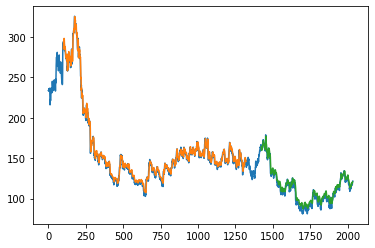

In [20]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()